In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn import datasets


In [3]:
## import iris dataset
iris=datasets.load_iris()

In [5]:
iris_data=pd.DataFrame(iris.data)

In [7]:
iris_data.columns=iris.feature_names

In [8]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
## standardization
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

In [11]:
x_scaled=scalar.fit_transform(iris_data)

In [13]:
## apply pca and reduce the number of dimension
from sklearn.decomposition import PCA


In [14]:
pca=PCA(n_components=2)

In [16]:
pca_scaled=pca.fit_transform(x_scaled)

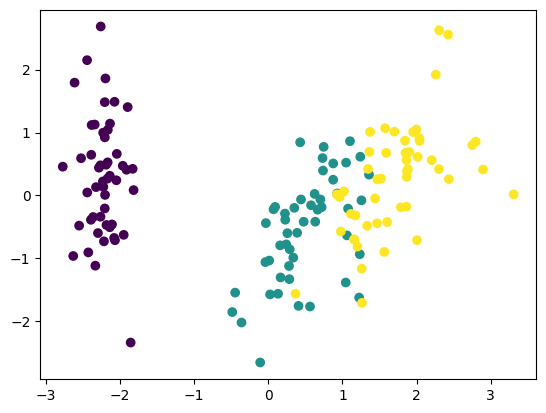

In [17]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=iris.target)

Text(0, 0.5, 'Eucledian distance')

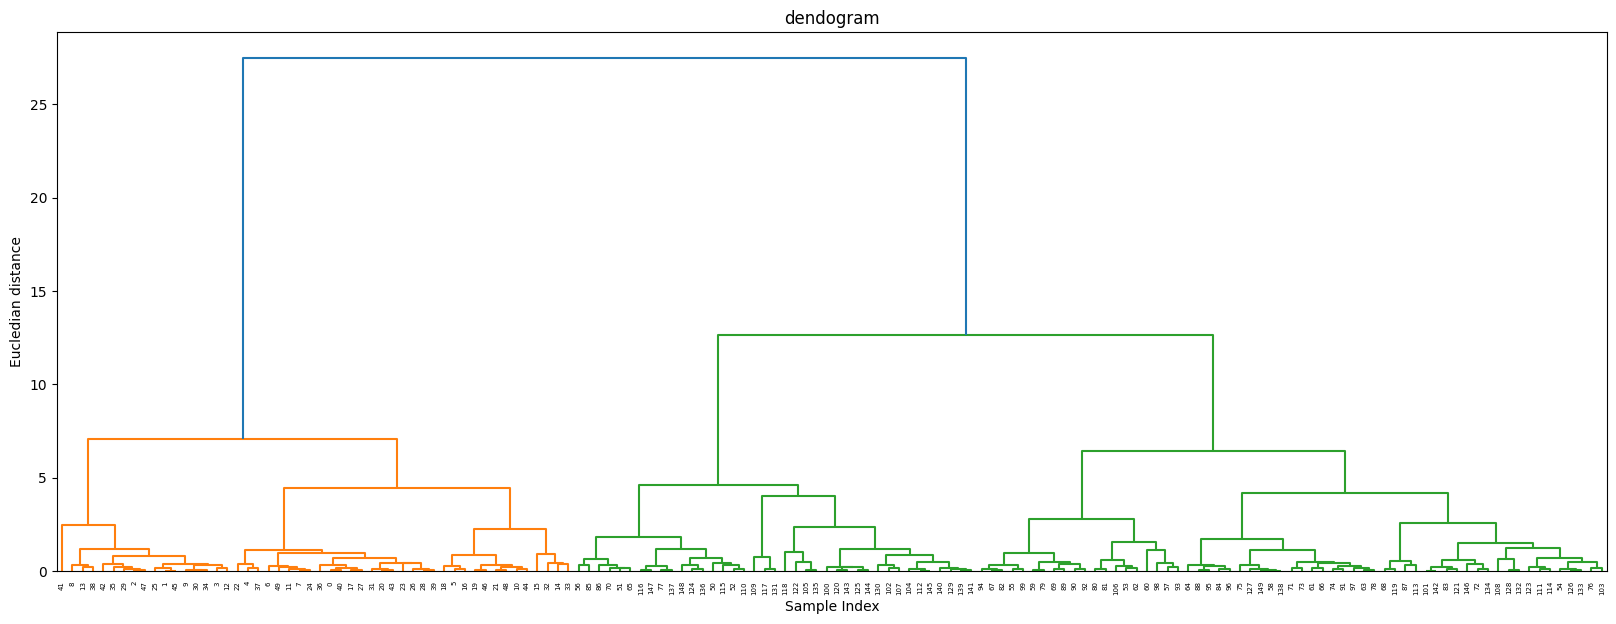

In [19]:
## apply agglomerative cluster
## to construct a dendogram
import scipy.cluster.hierarchy as sc
## plot a dendogram
plt.figure(figsize=(20,7))
plt.title("dendogram")
## create a dendogram
sc.dendrogram(sc.linkage(pca_scaled,method='ward'))
plt.title('dendogram')
plt.xlabel('Sample Index')
plt.ylabel('Eucledian distance')

In [24]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage='single')
cluster.fit(pca_scaled)

AgglomerativeClustering(linkage='single')

In [25]:
cluster.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

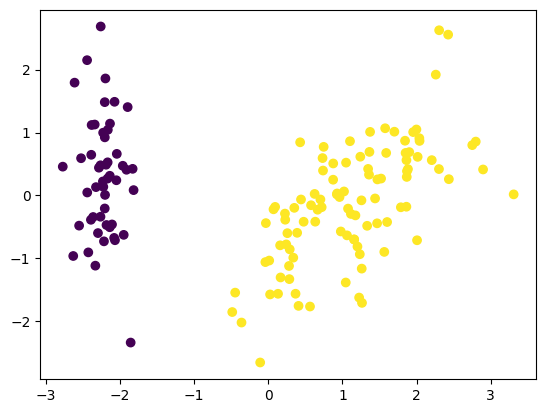

In [27]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=cluster.labels_)